Решить задачи указанным в задании численным методом на любом языке программирования. 
В результате работы программы выдать количество сделанных итераций, найденное решение 
и последовательность {x_k} на каждой итерации. Сделать визуализацию решения задачи.

Задача 1. Из начального приближения x0 = (-1, 1) решить задачу безусловной минимизации функции
f: R^2 -> R, f(x) = 2*x1^2 + x1*x2 + 3*x2^2 
градиентным методом, используя правило Армихо с параметрами _alpha = 1, epsilon = tetta = 1/2


In [1]:
from sympy import lambdify, symbols, derive_by_array
import numpy as np


x1, x2 = symbols("x(1:3)")
expr = 2*x1**2 + x1*x2 + 3*x2**2
f = lambdify((x1, x2), expr, "numpy")
df = lambdify((x1, x2), derive_by_array(expr, [x1, x2]), "numpy")

k=0
_alpha = 1
epsilon = tetta = 1/2
x = np.array([[-1, 1]])

alpha = np.array([])
for k in range(100):
    alpha = np.append(alpha, _alpha)
    d = -df(*x[k])
    while f(*(x[k]+alpha[k]*d)) \
        > f(*x[k]) + epsilon*alpha[k]*np.dot(-d, d):
            alpha[k] = tetta*alpha[k]
    
    x_next = [x[k]-alpha[k]*(-d)]
    x = np.append(x, x_next, axis=0)
    
    print(f"{k=}, x[{k+1}]={x[k+1]}")
    
    if np.linalg.norm(x[k+1] - x[k]) <= 10**(-9):
        print("\nСработал критерий остановки: ||x[k+1] - x[k]|| <= 10^-9")
        break
    if abs(f(*x[k+1])-f(*x[k])) <= 10**(-9):
        print("\nСработал критерий остановки: |f(x[k+1]) - f(x[k])| <= 10^-9")
        break
    if np.linalg.norm(df(*x[k+1])) <= 10**(-9):
        print("\nСработал критерий остановки: ||f'(x[k+1])|| <= 10^-9")
        break
    
print("Всего шагов:", k) # Или k+1? Как считать нулевой шаг?
print("Найденное решение: x =", x[k+1])

k=0, x[1]=[-0.625  0.375]
k=1, x[2]=[-0.09375 -0.03125]
k=2, x[3]=[-0.04296875  0.00390625]
k=3, x[4]=[-0.02197266  0.00634766]
k=4, x[5]=[-0.00158691  0.00231934]
k=5, x[6]=[-0.00108337  0.0007782 ]
k=6, x[7]=[-0.00063896  0.00032997]
k=7, x[8]=[-8.24928284e-05 -5.24520874e-06]
k=8, x[9]=[-4.05907631e-05  9.00030136e-06]
k=9, x[10]=[-2.25007534e-06  5.64754009e-06]
k=10, x[11]=[-1.83098018e-06  1.69314444e-06]

Сработал критерий остановки: |f(x[k+1]) - f(x[k])| <= 10^-9
Всего шагов: 10
Найденное решение: x = [-1.83098018e-06  1.69314444e-06]


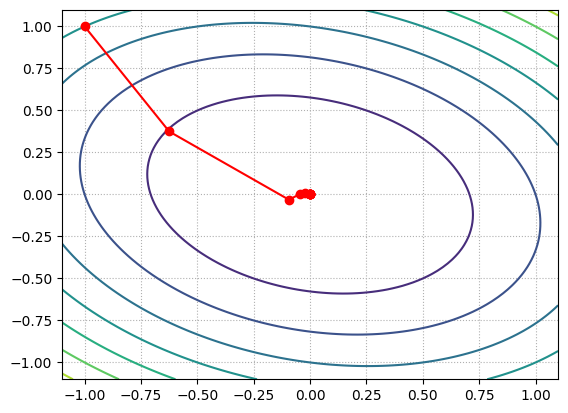

In [2]:
import matplotlib.pyplot as plt


a = b = np.linspace(-1.1, 1.1, 100)
x1_plot, x2_plot = np.meshgrid(a, b)

plt.contour(x1_plot, x2_plot, f(x1_plot, x2_plot))
plt.plot(x.T[0], x.T[1], marker='o',color="red")
plt.grid(linestyle=":")